In [1]:
from skimage import io, img_as_float, img_as_ubyte
from skimage.metrics import structural_similarity as ssim
from scipy import signal
from math import log10
import matplotlib.pyplot as plt
import numpy as np
import json
import math

In [2]:
def MED(actual, predicted):
    errors = np.abs(actual - predicted)
    return np.median(errors)

def NMED(actual, predicted):
    errors = np.abs(actual - predicted)
    return np.median(errors) / (np.max(actual) - np.min(actual))

def MRED(actual, predicted):

    abs_error = np.abs(predicted - actual)
    # Calculate the relative error
    rel_error = abs_error / actual
    
    # Calculate the mean relative error
    mean_rel_error = np.mean(rel_error)
    
    return mean_rel_error
    # errors = np.abs(actual - predicted)
    # return np.mean(errors / actual)

0.0
0.0
0.0
0.0
0.0


/home/fsengi/Documents/master/epc/epcExercise/.venv/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:251: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
/tmp/ipykernel_145145/485137683.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  loadedDict[approxAlgo]["psnr"][indexBit] = round(10 * log10(pic_list[0].max()**2 / mse),2)
/tmp/ipykernel_145145/3573020273.py:13: RuntimeWarning: invalid value encountered in divide
  rel_error = abs_error / actual


0.0
0.0
0.0
9.897536418956298
2082.663459339849
5927.834353678775
13605.670827955006
25437.158727641527


/tmp/ipykernel_145145/3573020273.py:13: RuntimeWarning: divide by zero encountered in divide
  rel_error = abs_error / actual


39969.92873686152
70691.3369168357
145702.22236031716
9.897536418956298
2082.663459339849
5927.834353678775
13605.670827955006
25437.158727641527
39969.92873686152
70691.3369168357
145702.22236031716
9.897536418956298
56.3651152498617
372.85535312557624
1598.3445952424856
6750.037532730961
31136.034479070626
106943.04497510604
202514.6703485156
9.897536418956298
40.9306914991702
158.72640604831275
611.4222127973446
2231.7239055873133
8829.389669924396
33353.98545823345
57319.13755854693
2187.530669371197
6374.581128526645
14669.87592476489
31353.714685598377
58319.50165222202


96209.38972893232
142227.454180343
180875.1548331182
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2119.948297990042
2551.554715102342
2922.200070071916
3882.2709680988382
7948.381622718052
22592.3939996312
64535.6469149917
153685.597495851
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.897536418956298
41.46427069887516
184.01690945970864
770.9202470957035
3198.888412317905
13455.155895260925
51231.46096625484
126084.13032269961
2187.530669371197
6374.581128526645
14669.87592476489
31353.714685598377
58319.50165222202
96209.38972893232
142227.454180343
180875.1548331182


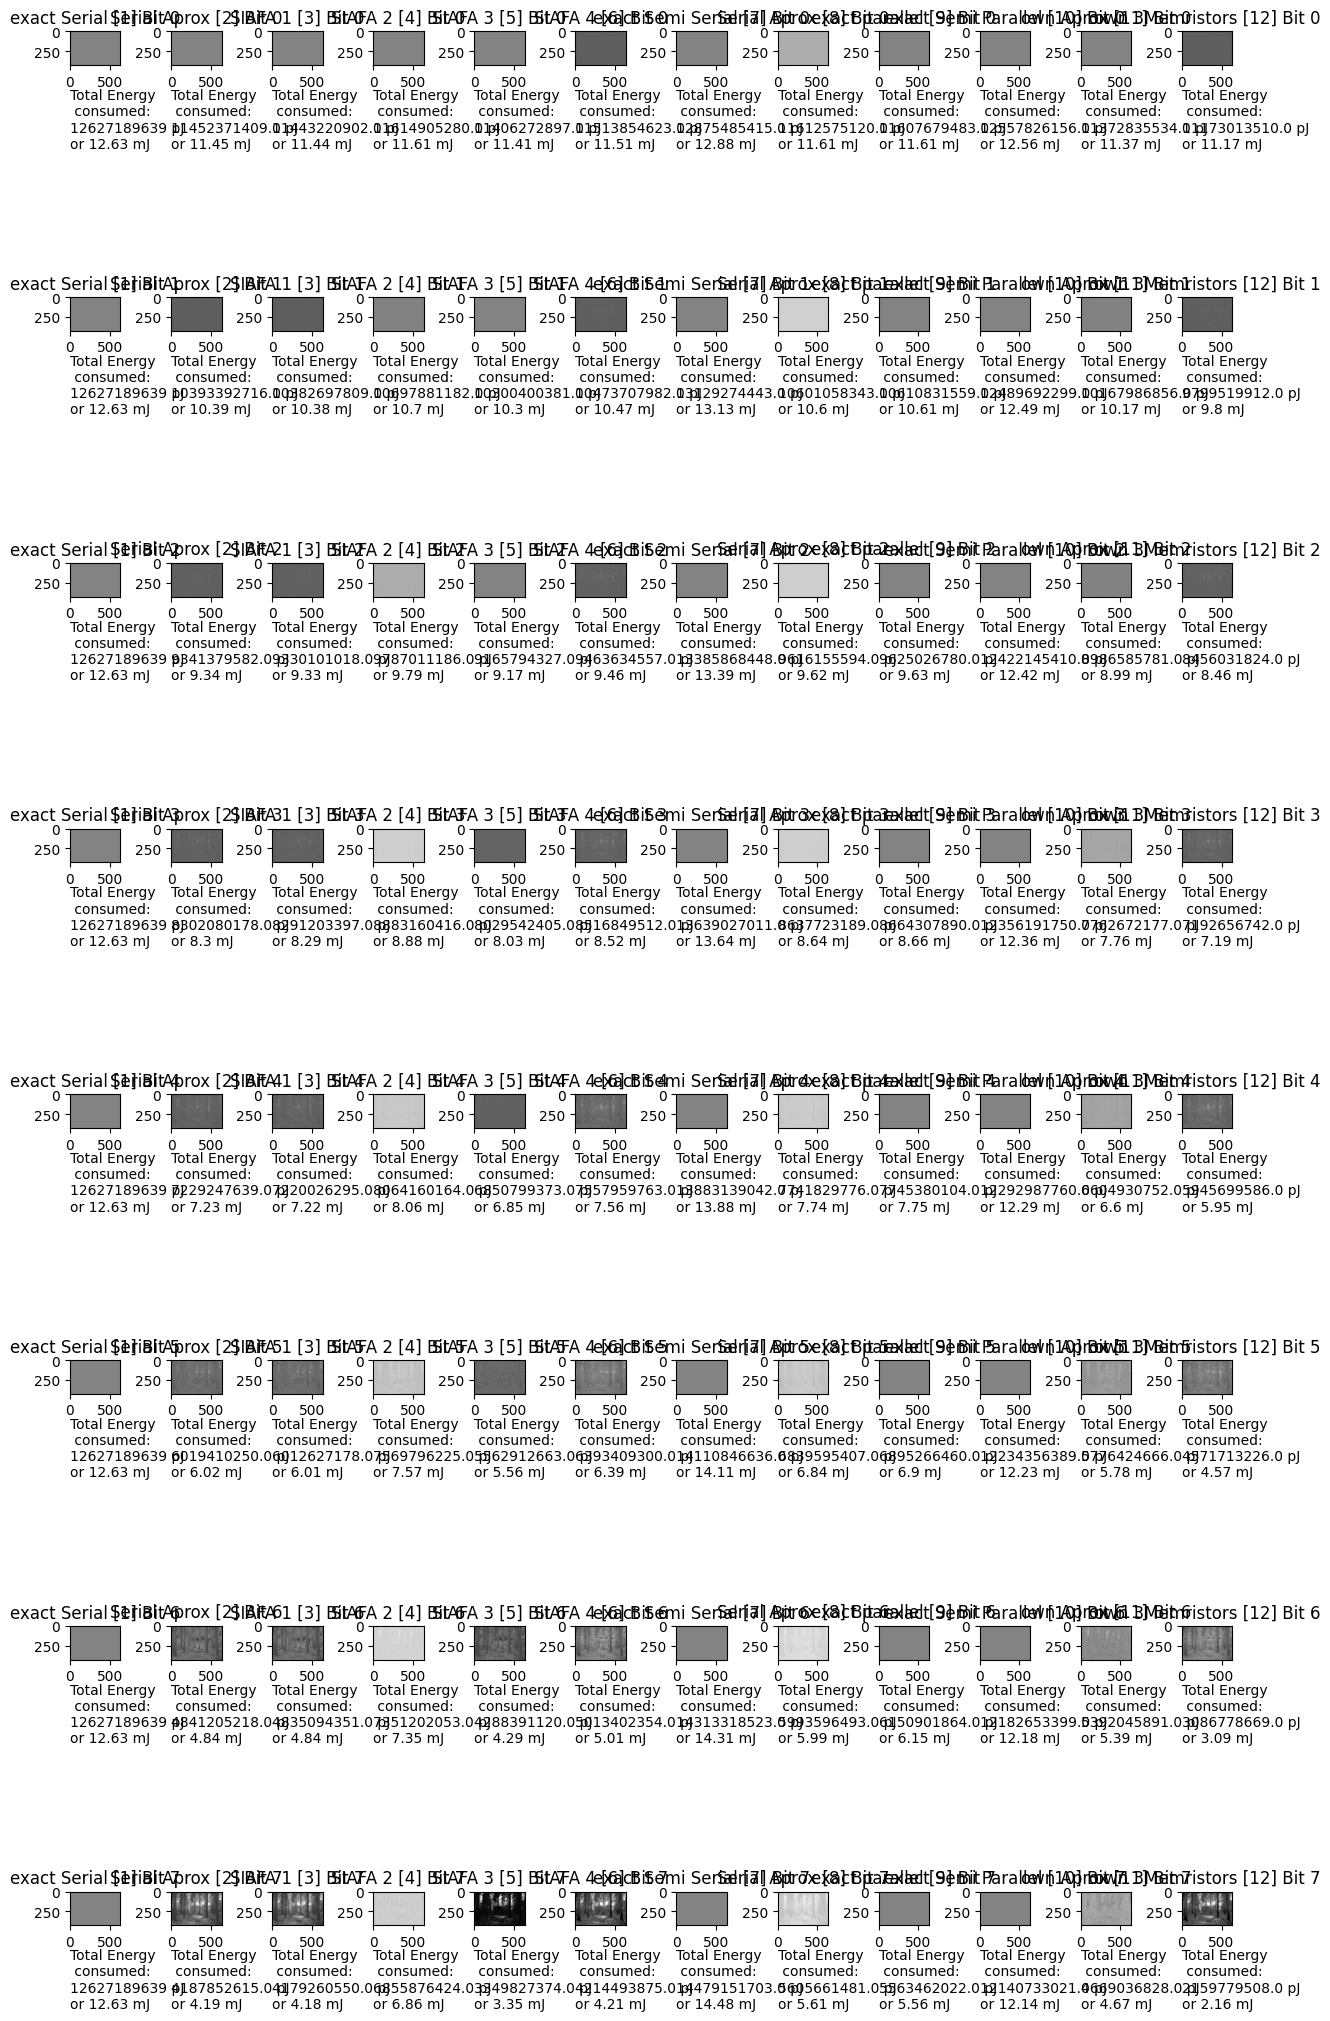

In [3]:
algo_list = ["exact Serial [1]","Serial Aprox [2]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","exact Semi Serial [7]","Serial Aprox [8]", "exact parallel [9]","exact Semi Parallel [10]","own Aprox [11]", "own 3Memristors [12]"]

parsed_data = {}
rows = 8
coll = len(algo_list)
bit_list = range(0,rows)

empty_list = [0]*rows

kernelname_list = []
kernelname_list.append("blurring")
kernelname_list.append("edge_Detection")

for i, name in enumerate(algo_list):
    parsed_data[name] = {"ssi": empty_list, "psnr": empty_list, "energy_con": empty_list, "med": empty_list, "nmed": empty_list, "mred": empty_list}

# load data from jsonfile 
with open('data.json', 'w') as json_file:
    json.dump(parsed_data, json_file, indent=4)

# Load the data from the JSON file into a dictionary
with open('data.json', 'r') as json_file:
    loadedDict = json.load(json_file)


fig, axs = plt.subplots(rows, coll, figsize=(15, 5))  # 5 rows, 1 column
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

#blurring
# loop throw all Bitpositions 
for indexAlgo, approxAlgo in enumerate(algo_list):
    pic_list = []
    pic_list.append(np.load(f"data_edge Detection/outputimage_exact Serial [1]_2.npy"))
    energy_list = []
    # loop throw all Algorithm
    for indexBit, approxBit in enumerate(bit_list):
        # show picture in subplot

        with open(f'data_edge Detection/{approxAlgo}_{indexBit}.json', 'r') as json_file:
            energy_list.append(json.load(json_file))
        
        pic_list.append(np.load(f"data_edge Detection/outputimage_{approxAlgo}_{indexBit}.npy"))

        # print(pic_list[0])
        
        axs[indexBit,indexAlgo].imshow(pic_list[-1], cmap = "gray")
        # Add an annotation to the subplot
        axs[indexBit,indexAlgo].annotate(f"\nTotal Energy\n consumed: \n{round(energy_list[indexBit],0)} pJ \nor {round(energy_list[indexBit]/10**9,2)} mJ", (0,0), (0,-5),xycoords='axes fraction', textcoords='offset points', va='top')
    
        axs[indexBit,indexAlgo].set_title(f"{approxAlgo} Bit {approxBit}")
       
        try:
            data_range = pic_list[0].max() - pic_list[-1].max()  
            mse = np.mean((pic_list[0] - pic_list[-1])**2)    
            print(mse) 
            # load results to dictionary
            # print(pic_list[0].max())
            loadedDict[approxAlgo]["ssi"][indexBit] = ssim(pic_list[0], pic_list[-1], data_range=data_range)
            loadedDict[approxAlgo]["psnr"][indexBit] = round(10 * log10(pic_list[0].max()**2 / mse),2)
            loadedDict[approxAlgo]["energy_con"][indexBit] = energy_list[-1]/10**3
            loadedDict[approxAlgo]["med"][indexBit] = MED(pic_list[0], pic_list[-1])
            loadedDict[approxAlgo]["nmed"][indexBit] = NMED(pic_list[0], pic_list[-1])
            loadedDict[approxAlgo]["mred"][indexBit] = MRED(pic_list[0], pic_list[-1])
            
        except Exception as e:
            print(f'Error plot at: indexBit {indexBit} {e}')
        else:
            continue
# Show the plot
plt.show()


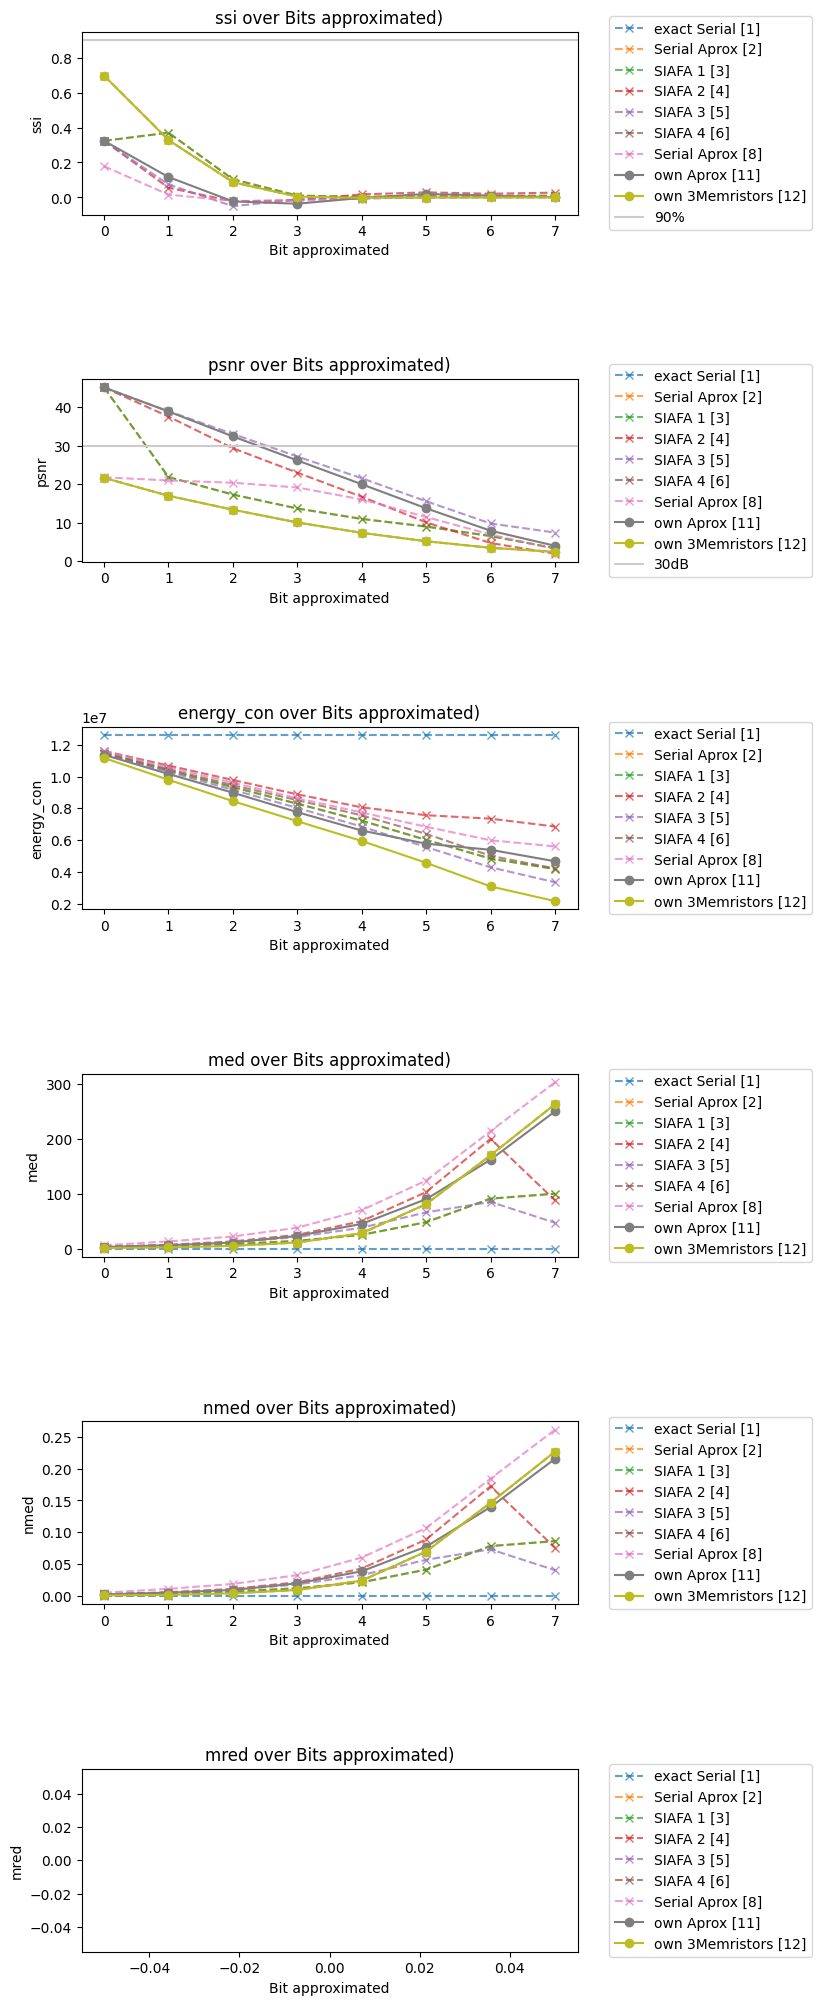

In [4]:
#error metrics list 
algo_list = ["exact Serial [1]","Serial Aprox [2]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","Serial Aprox [8]","own Aprox [11]", "own 3Memristors [12]"]
metrics_list = ["ssi", "psnr", "energy_con", "med", "nmed", "mred"]
rows = len(metrics_list)
coll = 1

fig, axs = plt.subplots(rows, coll )
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

#blurring
# loop throw all Bitpositions 
for indexMetric, metric in enumerate(metrics_list):

    for indexalgo, algo in enumerate(algo_list):
        if 'own' in algo:
            axs[indexMetric].plot(loadedDict[algo][metric], "o-", label=algo)
        else:
            axs[indexMetric].plot(loadedDict[algo][metric], "x--", label=algo, alpha=0.7)

    if "ssi" in metric:
        axs[indexMetric].axhline(y=0.9, color='0.8', linestyle='-', label='90%')
    if "psnr" in metric:
        axs[indexMetric].axhline(y=30, color='0.8', linestyle='-', label='30dB')
    axs[indexMetric].set_title(f"{metric} over Bits approximated)")
    axs[indexMetric].set_xlabel("Bit approximated")
    axs[indexMetric].set_ylabel(f'{metric}')
    # axs[indexMetric].legend()
    axs[indexMetric].legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()